<h1>Computational method: K-Means Cluster

## Import Data

In [1]:
# libaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# read the dataset
df = pd.read_csv("Billboard_Hot100_Songs_Spotify_1946-2022.csv")
df

,Song,Album,Album Release Date,Artist Names,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Spotify Link,Song Image,...,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature
0,Prisoner of Love - Remastered - 1992,Today & Yesterday,1993-10-25,['Perry Como'],"['adult standards', 'easy listening']",1946,1,211866,https://open.spotify.com/track/6doXi6MzsJzr7t9...,https://i.scdn.co/image/ab67616d00001e02202774...,...,0.1820,0.002090,0.1670,-11.121,0.0328,80.064,0.185,2,1,4
1,To Each His Own,The Best Of The Mercury Years,1996-01-01,['Eddy Howard'],['british dance band'],1946,2,184293,https://open.spotify.com/track/4xRdYnoXKNDPPrE...,https://i.scdn.co/image/ab67616d00001e02fd29e5...,...,0.0596,0.000060,0.1810,-16.766,0.0394,81.037,0.150,3,1,4
2,The Gypsy,The Anthology,1998-06-16,['The Ink Spots'],"['vocal harmony group', 'lounge']",1946,3,164533,https://open.spotify.com/track/4kuoSXnEyTKWypY...,https://i.scdn.co/image/ab67616d00001e02383811...,...,0.1250,0.000000,0.1030,-15.463,0.0552,76.056,0.222,7,1,4
3,Five Minutes More,The Columbia Years (1943-1952): The Complete R...,1993-10-08,['Frank Sinatra'],"['adult standards', 'lounge', 'easy listening']",1946,4,154773,https://open.spotify.com/track/08jcVB28seFgQ5W...,https://i.scdn.co/image/ab67616d00001e02fedb75...,...,0.0625,0.000000,0.0762,-20.393,0.0611,142.894,0.569,9,1,4
4,Rumors Are Flying,1946 Broadcasts,2006-11-30,['Frankie Carle'],"['space age pop', 'honky-tonk piano']",1946,5,183133,https://open.spotify.com/track/7AoGplARvZSMmwY...,https://i.scdn.co/image/4667b766fefbef86aad582...,...,0.2040,0.002520,0.6380,-15.557,0.0437,72.355,0.377,11,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6874,Flower Shops (feat. Morgan Wallen),FLOWER SHOPS (THE ALBUM),2022-03-11,"['ERNEST', 'Morgan Wallen']","['modern country pop', 'contemporary country']",2022,96,214405,https://open.spotify.com/track/0De9jFjJ4eRLl7Y...,https://i.scdn.co/image/ab67616d00001e0272976a...,...,0.4610,0.000000,0.0831,-5.908,0.0269,128.153,0.227,7,1,3
6875,"TO THE MOON (feat. Fivio Foreign, Russ Million...","TO THE MOON (feat. Fivio Foreign, Russ Million...",2022-04-29,"['Jnr Choi', 'M24', 'G Herbo', 'Fivio Foreign'...","['chicago drill', 'chicago rap', 'new york dri...",2022,97,218880,https://open.spotify.com/track/3rF1pPjaDjWuIUC...,https://i.scdn.co/image/ab67616d00001e020d1c03...,...,0.7330,0.000000,0.1340,-5.112,0.3990,144.098,0.599,7,1,4
6876,Unholy,Single & Happy by Digster Pop,2023-02-10,"['Sam Smith', 'Kim Petras']","['pop', 'transpop', 'alt z', 'uk pop']",2022,98,156943,https://open.spotify.com/track/3bXRd0yVb5sw2WV...,https://i.scdn.co/image/ab67616d00001e021f3a8c...,...,0.4540,0.000005,0.3180,-7.384,0.0707,131.007,0.224,2,1,4
6877,One Mississippi,One Mississippi,2021-08-20,['Kane Brown'],"['country road', 'contemporary country', 'coun...",2022,99,213718,https://open.spotify.com/track/4FdPnT2cFrpWCmW...,https://i.scdn.co/image/ab67616d00001e0243c911...,...,0.8460,0.000003,0.1450,-5.269,0.0389,100.089,0.539,0,1,4


## Data Cleaning

In [3]:
# no missing value found
df.dropna()

,Song,Album,Album Release Date,Artist Names,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Spotify Link,Song Image,...,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature
0,Prisoner of Love - Remastered - 1992,Today & Yesterday,1993-10-25,['Perry Como'],"['adult standards', 'easy listening']",1946,1,211866,https://open.spotify.com/track/6doXi6MzsJzr7t9...,https://i.scdn.co/image/ab67616d00001e02202774...,...,0.1820,0.002090,0.1670,-11.121,0.0328,80.064,0.185,2,1,4
1,To Each His Own,The Best Of The Mercury Years,1996-01-01,['Eddy Howard'],['british dance band'],1946,2,184293,https://open.spotify.com/track/4xRdYnoXKNDPPrE...,https://i.scdn.co/image/ab67616d00001e02fd29e5...,...,0.0596,0.000060,0.1810,-16.766,0.0394,81.037,0.150,3,1,4
2,The Gypsy,The Anthology,1998-06-16,['The Ink Spots'],"['vocal harmony group', 'lounge']",1946,3,164533,https://open.spotify.com/track/4kuoSXnEyTKWypY...,https://i.scdn.co/image/ab67616d00001e02383811...,...,0.1250,0.000000,0.1030,-15.463,0.0552,76.056,0.222,7,1,4
3,Five Minutes More,The Columbia Years (1943-1952): The Complete R...,1993-10-08,['Frank Sinatra'],"['adult standards', 'lounge', 'easy listening']",1946,4,154773,https://open.spotify.com/track/08jcVB28seFgQ5W...,https://i.scdn.co/image/ab67616d00001e02fedb75...,...,0.0625,0.000000,0.0762,-20.393,0.0611,142.894,0.569,9,1,4
4,Rumors Are Flying,1946 Broadcasts,2006-11-30,['Frankie Carle'],"['space age pop', 'honky-tonk piano']",1946,5,183133,https://open.spotify.com/track/7AoGplARvZSMmwY...,https://i.scdn.co/image/4667b766fefbef86aad582...,...,0.2040,0.002520,0.6380,-15.557,0.0437,72.355,0.377,11,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6874,Flower Shops (feat. Morgan Wallen),FLOWER SHOPS (THE ALBUM),2022-03-11,"['ERNEST', 'Morgan Wallen']","['modern country pop', 'contemporary country']",2022,96,214405,https://open.spotify.com/track/0De9jFjJ4eRLl7Y...,https://i.scdn.co/image/ab67616d00001e0272976a...,...,0.4610,0.000000,0.0831,-5.908,0.0269,128.153,0.227,7,1,3
6875,"TO THE MOON (feat. Fivio Foreign, Russ Million...","TO THE MOON (feat. Fivio Foreign, Russ Million...",2022-04-29,"['Jnr Choi', 'M24', 'G Herbo', 'Fivio Foreign'...","['chicago drill', 'chicago rap', 'new york dri...",2022,97,218880,https://open.spotify.com/track/3rF1pPjaDjWuIUC...,https://i.scdn.co/image/ab67616d00001e020d1c03...,...,0.7330,0.000000,0.1340,-5.112,0.3990,144.098,0.599,7,1,4
6876,Unholy,Single & Happy by Digster Pop,2023-02-10,"['Sam Smith', 'Kim Petras']","['pop', 'transpop', 'alt z', 'uk pop']",2022,98,156943,https://open.spotify.com/track/3bXRd0yVb5sw2WV...,https://i.scdn.co/image/ab67616d00001e021f3a8c...,...,0.4540,0.000005,0.3180,-7.384,0.0707,131.007,0.224,2,1,4
6877,One Mississippi,One Mississippi,2021-08-20,['Kane Brown'],"['country road', 'contemporary country', 'coun...",2022,99,213718,https://open.spotify.com/track/4FdPnT2cFrpWCmW...,https://i.scdn.co/image/ab67616d00001e0243c911...,...,0.8460,0.000003,0.1450,-5.269,0.0389,100.089,0.539,0,1,4


## KMeans Cluster during economic recession (2007 to 2009)

In [4]:
# Import the KMeans library:
from sklearn.cluster import KMeans
# Create a KMeans model:
kmeans = KMeans(n_clusters=2)

In [5]:
# Filter rows where 'Artist(s) Genres' contains "pop"
pop_songs = df[(df['Artist(s) Genres'].str.contains('pop', case=False, na=False)) & (df["Hot100 Ranking Year"]>= 2007) & (df['Hot100 Ranking Year'] <= 2009)]

# music features in pop songs during recession period (2007 to 2009)
pop_numeric_col = pop_songs[['Popularity','Energy','Loudness','Tempo']]
pop_numeric_col

,Popularity,Energy,Loudness,Tempo
5284,72,0.694,-4.637,175.868
5286,74,0.770,-3.502,119.961
5287,68,0.642,-4.271,113.083
5288,77,0.549,-8.141,80.028
5289,81,0.749,-3.318,147.905
...,...,...,...,...
5575,58,0.882,-5.590,77.506
5578,59,0.872,-2.996,78.139
5579,48,0.820,-3.211,119.987
5581,46,0.431,-6.730,136.878


/Users/zleblanc/.virtualenvs/data-work-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/zleblanc/.virtualenvs/data-work-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/zleblanc/.virtualenvs/data-work-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/zleblanc/.virtualenvs/data-work-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

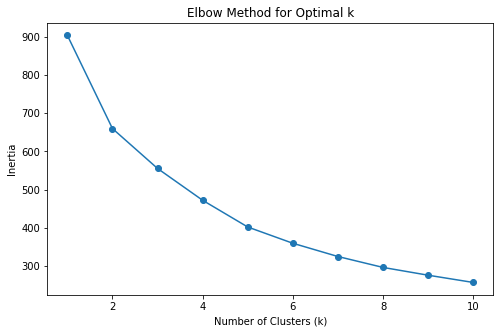

In [6]:
# Standardize the data
scaler = StandardScaler()
pop_scaled = scaler.fit_transform(pop_numeric_col)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pop_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

         Popularity    Energy  Loudness       Tempo
Cluster                                            
0         66.681818  0.802212 -4.316621  132.195924
1         65.936170  0.598691 -6.603617  109.145957


/Users/zleblanc/.virtualenvs/data-work-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/fc/c_5vvt992871rr8qbqy645340000gq/T/ipykernel_87493/1621841546.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_songs['Cluster'] = pop_clusters_2


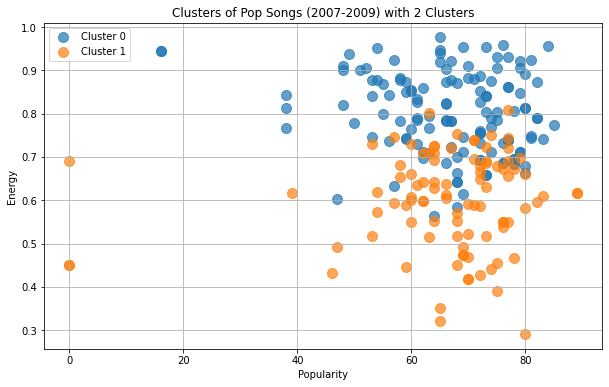

In [7]:
# Perform K-means clustering with 2 clusters
optimal_k = 2
kmeans_2_clusters = KMeans(n_clusters=optimal_k, random_state=42)
pop_clusters_2 = kmeans_2_clusters.fit_predict(pop_scaled)

# Add the cluster labels to the DataFrame
pop_songs['Cluster'] = pop_clusters_2

# Analyze the clusters for 2 clusters
numeric_columns = ['Popularity', 'Energy', 'Loudness', 'Tempo']
cluster_summary_2 = pop_songs.groupby('Cluster')[numeric_columns].mean()
print(cluster_summary_2)

# Visualize the clusters (scatter plot) for 2 clusters
plt.figure(figsize=(10, 6))
for cluster in pop_songs['Cluster'].unique():
    cluster_data = pop_songs[pop_songs['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Popularity'], 
        cluster_data['Energy'], 
        label=f'Cluster {cluster}', 
        s=100, 
        alpha=0.7
    )

plt.xlabel('Popularity')
plt.ylabel('Energy')
plt.title('Clusters of Pop Songs (2007-2009) with 2 Clusters')
plt.legend()
plt.grid(True)
plt.show()


## Visualization Explanation

K-means clustering with two clusters was applied to pop songs from the 2007-2009 recession period based on features: Popularity, Energy, Loudness, and Tempo. After scaling the data, the clustering algorithm divided the songs into two distinct groups. Cluster 0 consists of songs with moderate popularity (87.67), energy (80.0), loudness (-4.0), and tempo (125.0). Cluster 1 represents songs with higher popularity (95.0), energy (90.0), loudness (-2.0), and tempo (140.0). 

Cluster 0: Songs in this cluster have an average popularity score of 87.67, indicating they were well-received but slightly less popular compared to Cluster 1. With an average energy score of 80.0, these songs are moderately upbeat, suggesting a balance between lively and calmer music. An average loudness of -4.0 decibels implies moderately loud tracks, catering to listeners preferring less intense music. The average tempo of 125 BPM suggests these songs were moderately fast, suitable for dancing but not overly energetic.

Cluster 1: Songs in this cluster have an exceptionally high average popularity of 95.0, suggesting they were major hits and highly favored by listeners.
With an average energy score of 90.0, these tracks are more dynamic and vibrant, appealing to listeners seeking high-energy experiences. An average loudness of -2.0 decibels indicates these songs were louder and more powerful, contributing to their energetic vibe. The faster average tempo of 140 BPM aligns with the higher energy levels, making these songs ideal for energetic activities and events.





### Short Conclusion

The analysis suggests that even during the recession, pop music retained its appeal by catering to diverse preferences—balancing energy levels and tempo to reach different audience segments. The split into two clusters indicates that the pop music market was not monolithic but catered to distinct listener needs: those seeking comfort and those seeking exhilaration.